<a href="https://colab.research.google.com/github/RishanshuYadav/HOTEL-BOOKING-ANALYSIS/blob/main/Colab_for_EDA_on_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Github link -- https://github.com/RishanshuYadav/HOTEL-BOOKING-ANALYSIS



> **Lets import the necassary and required libraries and modules **



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium 
from folium.plugins import HeatMap



# **Lets connect the drive to import file.**



In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# **Importing the csv file from drive.**

In [ ]:
path = '/content/drive/MyDrive/Alma Better/Hotel Bookings.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)




# **Checking the information about the data**





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Seeing how many columns we have to deal.**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#  **First we check for the null values and remove them for column.**

In [ ]:
# Checking for null values.
df.isnull().sum().sort_values(ascending=False)[:7]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
dtype: int64

In [ ]:
 #Because of the null value we drop the company and agent columns
#for our simplicity in further operations. 
df = df.drop('company' , axis = 1)

In [ ]:
df = df.drop('agent',axis = 1)

In [ ]:
df.isnull().sum().sort_values(ascending=False)[:7]

country                        488
children                         4
hotel                            0
is_repeated_guest                0
reservation_status               0
total_of_special_requests        0
required_car_parking_spaces      0
dtype: int64

In [ ]:
# to drop null values

df = df.dropna()

In [ ]:
# LETS CHECK THAT NULL VALUES ARE GONE FROM THE THE MAIN DATA SET OR NOT

df.isnull().sum().sort_values(ascending=False)[:7]
                                        

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
dtype: int64

In [ ]:
# Now in data set there are going to have some duplicate values also lets see that.

Duplicates_in_data = sum(df.duplicated(keep = 'first'))
Duplicates_in_data

31984

In [ ]:
#here we drop all duplicates values from our data set.
new_data = df.drop_duplicates()


# Here we are checking hohw many years of data we have for analysis

In [ ]:
df.arrival_date_year.value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

# For further we neglecting the cancelled booking form the data we only focusing on the conformed booking throughout the data.

In [ ]:

data1 = df[df['is_canceled']==0]['arrival_date_year'].value_counts()

In [ ]:
data1

2016    36122
2017    24870
2015    13753
Name: arrival_date_year, dtype: int64

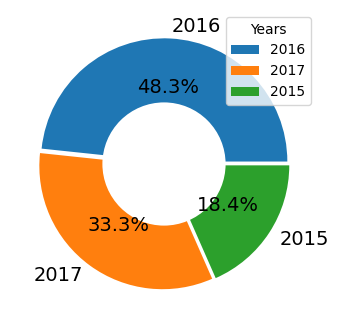

In [ ]:
l_1 = ["2016","2017","2015"]
explode = (0.02, 0.02, 0.02)
plt.figure(figsize =(6, 4))
plt.pie(data1, labels=l_1, explode=explode, autopct='%1.1f%%',textprops={'fontsize': 14})
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
plt.legend(l_1, loc = "upper right", title="Years")
fig.gca().add_artist(centre_circle)
plt.show()

# The process in same as above but our variable are different. For creating next pie chart and will be same for every pie chart.

In [ ]:
data2 = df['hotel'].value_counts()

In [ ]:
data2

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

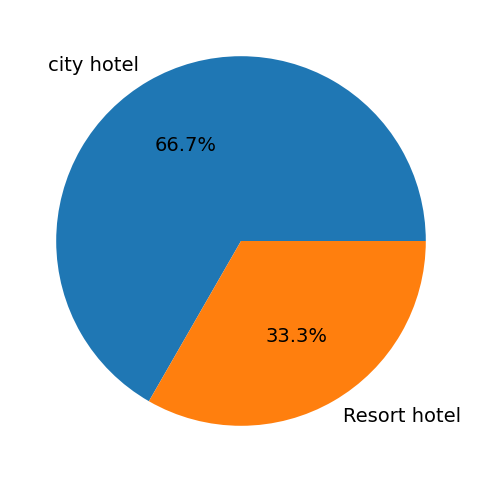

In [ ]:
l_2 = ['city hotel' , 'Resort hotel']
plt.figure(figsize=(8,6))
plt.pie(data2,labels=l_2,autopct='%1.1f%%',textprops={'fontsize': 14})
plt.show()


#Form above pie chart this data set contain 66.7% are City hotels and 33.3% are Resort hotels in our data set

# Checking the how many different types of customer are these hotels are having

In [ ]:
data3 = df['customer_type'].value_counts()

In [ ]:
data3

Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

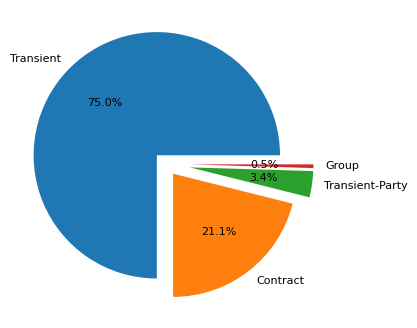

In [ ]:
l_3 = df['customer_type'].unique()
l_3
explode = (0.1, 0.1, 0.2, 0.2)
plt.figure(figsize =(6,4))
plt.pie(data3,labels=l_3, explode=explode, autopct='%1.1f%%',textprops={'fontsize': 8})
plt.show()

From above chart we can see that 75.0 % , 21.1 %, 3.4 %, 0.5 % business are coming form transient, contract, transient-party and group respectively. And here we only considered the conform bookings

# **Form next chart we are checking form which country the guest are coming form.**

In [ ]:
country_df = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())

In [ ]:
country_df.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df["Guests in %"] = round(country_df["Number of Guests"] / total_guests * 100, 2)
country_df["country"] = country_df.index

In [ ]:
fig = px.pie(country_df,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

you can see the percentage of of every country that the tourist is coming from.
Lets see this in more understanding way.

In [ ]:
# Crating a dataframe of guests form all country which are not canceled the bookings.
country_wise_guests_df = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests_df.columns = ['country', 'No of guests']
country_wise_guests_df

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests_df, locations = country_wise_guests_df['country'],
                           color = country_wise_guests_df['No of guests'], hover_name = country_wise_guests_df['country'])
guests_map.show()

Here we have created a heat map so we can see the country which the guests are coming from. 

# **Now we going to see the data by more value-based bar charts. For more specific values for further analysis**

In [ ]:
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

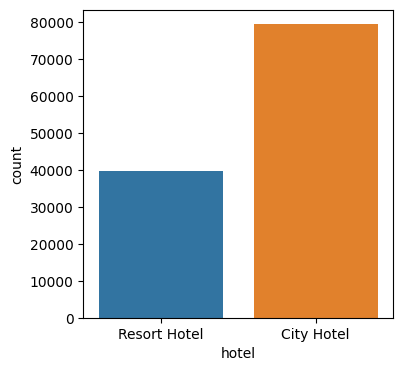

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.countplot(x='hotel' , data=df)
plt.show()

# Let’s check the number of conformed booking form the data set

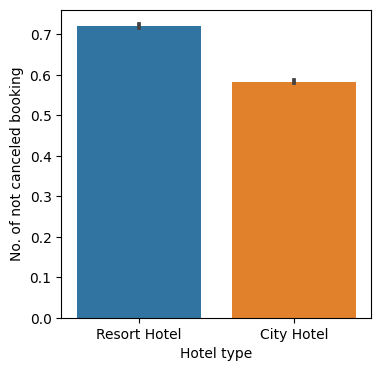

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df['hotel'], y=df['is_canceled']==0 )
plt.xlabel("Hotel type")
plt.ylabel("No. of not canceled booking")
plt.show()

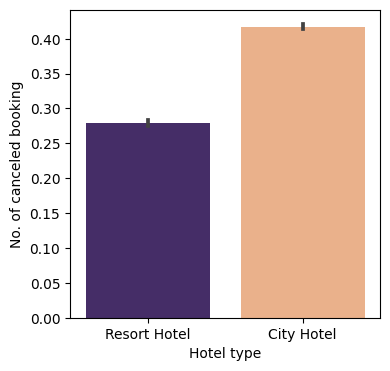

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df['hotel'], y=df['is_canceled'] , palette=['#432371',"#FAAE7B"])
plt.xlabel("Hotel type")
plt.ylabel("No. of canceled booking")
plt.show()

# **Checking the market segment which these two hotels shears.**

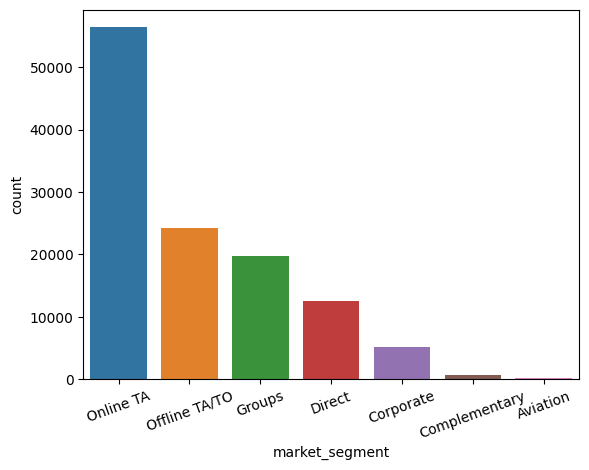

In [ ]:
sns.countplot(x='market_segment', data=df, order=df['market_segment'].value_counts(ascending=False).index )
plt.xticks(rotation=20)
plt.rcParams['figure.figsize'] =(10,8)
plt.show()

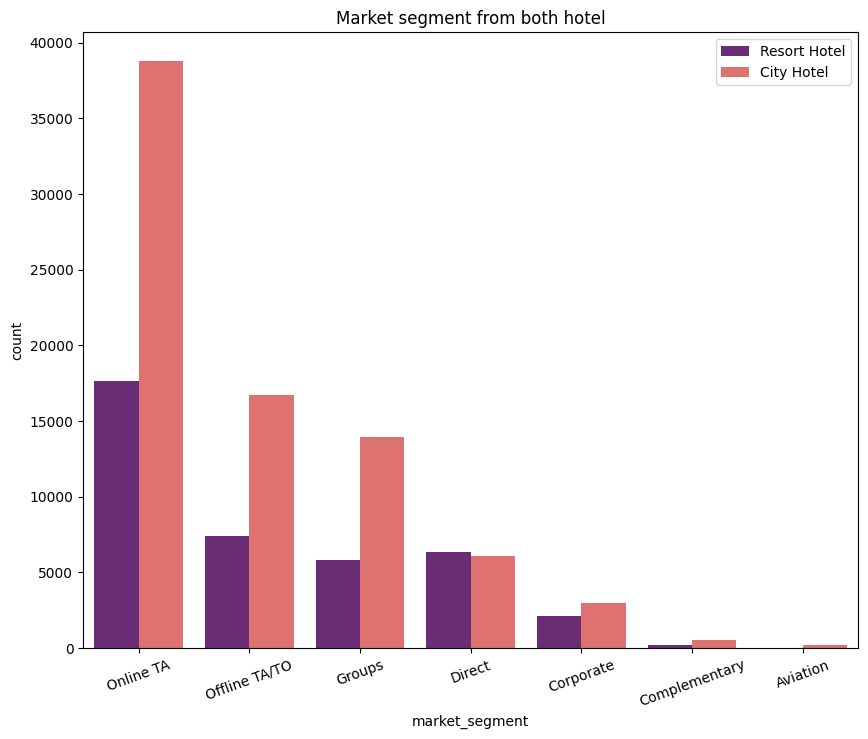

In [ ]:
sns.countplot(x='market_segment', data=df, hue='hotel', palette='magma' , order=df['market_segment'].value_counts(ascending=False).index)
plt.rcParams['figure.figsize'] = (10,8)
plt.xticks(rotation=20)
plt.title('Market segment from both hotel')
plt.legend(loc = 'upper right')
plt.show()

# **Checking the arrived guest thought out different months**

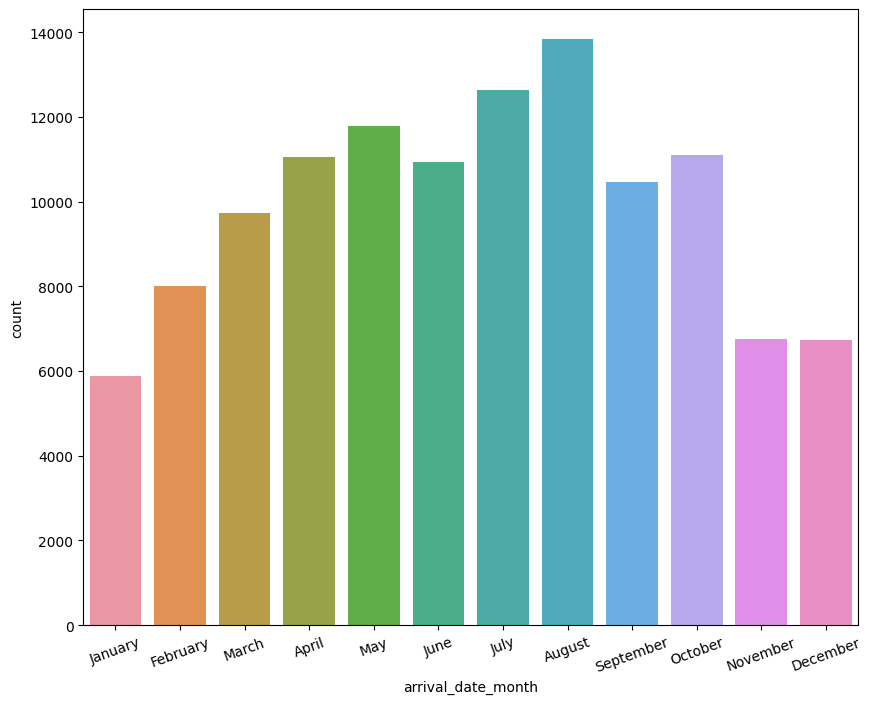

In [ ]:
sns.countplot(x='arrival_date_month', data=df , order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.xticks(rotation=20) 
plt.rcParams['figure.figsize'] = (16,4)
plt.show()

# **How does the price per night vary over the year?**

In [ ]:
# normalize price per night (adr):
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
full_data_guests = df.loc[df["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

In [ ]:
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

<ipython-input-41-ad9745aa40e2>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




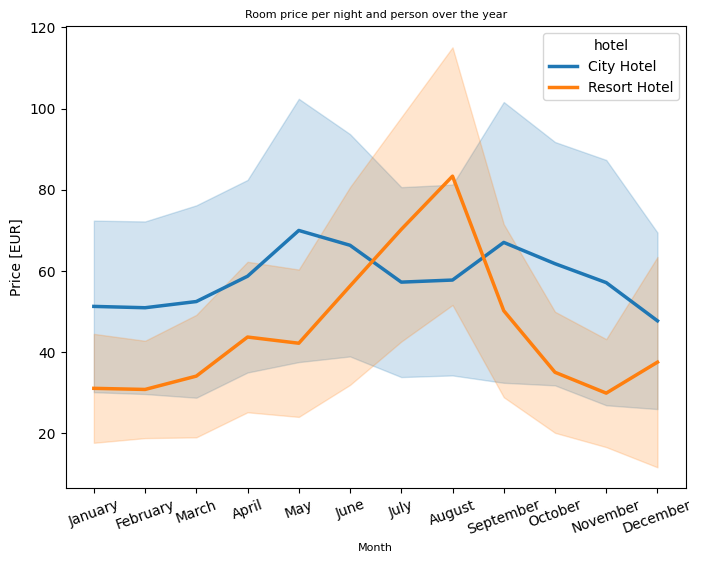

In [ ]:
# barplot with standard deviation:
plt.figure(figsize=(8,6))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=8)
plt.xlabel("Month", fontsize=8)
plt.xticks(rotation=20)
plt.ylabel("Price [EUR]", fontsize=10)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here). The price of the city hotel varies less and is most expensive during spring and autumn.

**OBSERVATIONS**

 1 . There is a peak on the prices for the Resort hotel is between July and August.

 2 . There is a peak on the prices for the City hotel is on May and September.

# **Checking the most preferred hotel room by guests.**

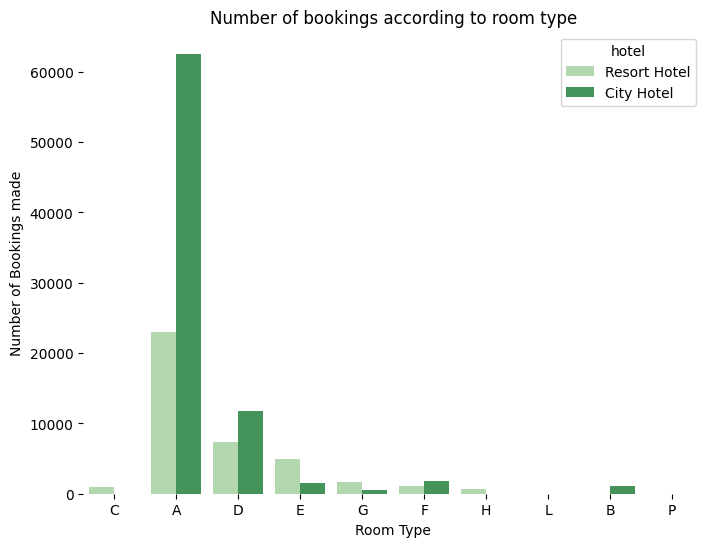

In [ ]:
# Number of bookings according to room type
plt.figure(figsize=(6,5))
sns.countplot(x='reserved_room_type', hue='hotel', data=df, palette="Greens")
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings made")
plt.title("Number of bookings according to room type")
sns.despine(bottom = True, left = True)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

# **OBSERVATIONS**;
1 The room type A have more bookings and followed by D

2 The room type L and P have almost none and no bookings


# Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot. so we are going to create boxplot for better understanding of this

In [ ]:
data5 = df[df['is_canceled'] == 0]

px.box(data_frame = data5, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

The figure shows that the average price per room depends on its type and the standard deviation.

Here you can also see the

In [ ]:
#Correlation between variable of the data set

co = df.corr()
co

<ipython-input-44-26c2981085f9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp
is_canceled,1.000000,0.291994,0.016412,0.007465,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643,0.017088
lead_time,0.291994,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536,-0.128945
arrival_date_year,0.016412,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,0.010128,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927,0.138418
arrival_date_week_number,0.007465,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,-0.030411,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778,0.054088
arrival_date_day_of_month,-0.006127,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082,0.022618
stays_in_weekend_nights,-0.002631,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669,-0.041608
stays_in_week_nights,0.024110,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785,-0.029488
adults,0.058381,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815,-0.322518
children,0.004751,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786,-0.078791
babies,-0.032521,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601,0.000078


# **Ploting heatmap for better understanding.**

<ipython-input-45-5c9d048ad97d>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



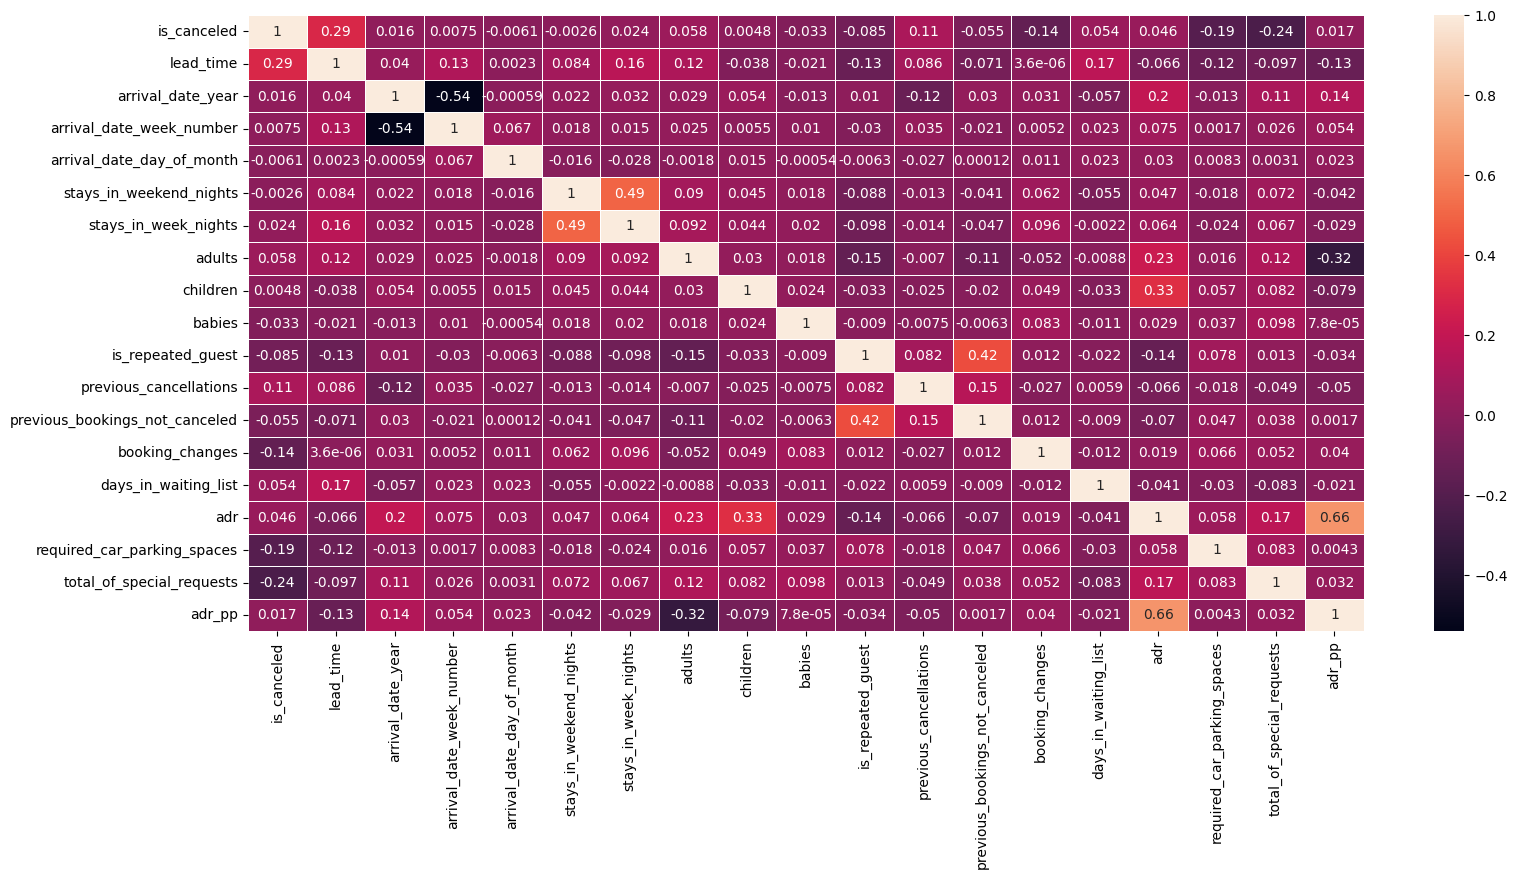

In [ ]:

plt.figure(figsize = (18,8))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 0.5)
plt.show()

# **CONCLUSION**:

City hotels are the most preferred hotel type by the guests. We can say City
hotel is the busiest hotel.

27.5 % bookings were got cancelled out of all the bookings. Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.

The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.

Most of the customers (91.6%) do not require car parking spaces. 79.1 % bookings were made through TA/TO (travel agents/Tour operators). BB( Bed & Breakfast) is the most preferred type of meal by the guests. Maximum number of guests were from Portugal, i.e. more than 25000 guests. Most of the bookings for City hotels and Resort hotel were happened in 2016. Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.

Booking cancellation rate is high for City hotels which almost 30 %. Average lead time for resort hotel is high.

Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.

Resort hotels have the most repeated guests.

Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.

Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking